In [1]:
from tensorflow.keras.utils import to_categorical
from keras import layers
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras import models


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/20


I0000 00:00:1733768841.349458      68 service.cc:145] XLA service 0x78677c007680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733768841.349513      68 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733768841.349519      68 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 39/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3039 - loss: 1.9395

I0000 00:00:1733768845.485776      68 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6363 - loss: 0.9889 - val_accuracy: 0.8483 - val_loss: 0.4228
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8460 - loss: 0.4274 - val_accuracy: 0.8754 - val_loss: 0.3399
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8787 - loss: 0.3417 - val_accuracy: 0.8778 - val_loss: 0.3403
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8956 - loss: 0.2909 - val_accuracy: 0.8956 - val_loss: 0.2833
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9057 - loss: 0.2595 - val_accuracy: 0.9087 - val_loss: 0.2500
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9148 - loss: 0.2345 - val_accuracy: 0.9041 - val_loss: 0.2549
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9246 - loss: 0.2094 - val_accuracy: 0.8967 - val_loss: 0.2881
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9289 - loss: 0.1984 - val_accuracy: 0.9151 - va

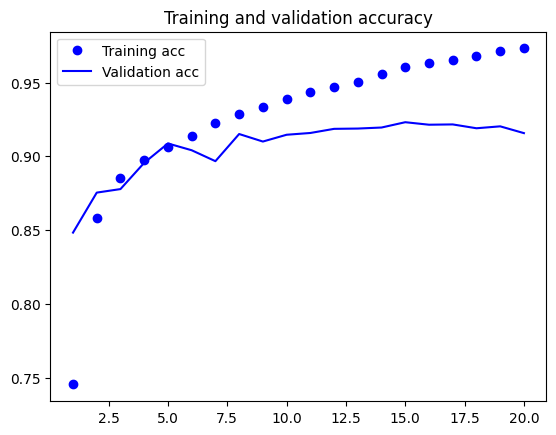

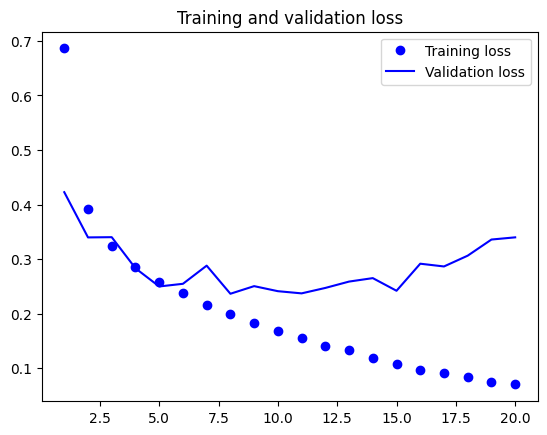

In [6]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9145 - loss: 0.3439
0.9157000184059143


In [8]:
model.save('SimpleRNN.keras')

In [9]:
import json

with open('history_SimpleRNN.json', 'w') as f:
    json.dump(history.history, f)
